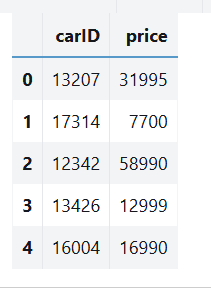

In [25]:
import pandas as pd
#데이터 로드
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_test.csv")


display(X_train.head())
display(y_train.head())

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990


In [14]:
X_train.shape, X_test.shape, y_train.shape

((4960, 10), (2672, 10), (4960, 2))

In [26]:
X_train = X_train.merge(y_train, on='carID', how='left')

In [66]:
X_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_train.csv")
y_train = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/y_train.csv")
X_test= pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/carsprice/X_test.csv")

X_train = X_train.merge(y_train, on='carID', how='left')
X_train = X_train.drop('carID', axis=1)
X_test_id =  X_test.pop('carID')
target = X_train.pop('price')


#스켈링
from sklearn.preprocessing import RobustScaler
cols = ['year', 'mileage']
scaler = RobustScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])


#인코딩을 위한 object들의 unique 값 확인
object_cols = ['brand', 'model', 'transmission', 'fuelType']

# for col in object_cols:
#     print(X_train[col].unique())
#     print(X_test[col].unique())

# print(X_train[object_cols].nunique())
# print(X_test[object_cols].nunique())


#라벨인코딩
from sklearn.preprocessing import LabelEncoder
object_cols = X_train.select_dtypes(include='object')
for col in object_cols:
  le = LabelEncoder()
  X_train[col] = le.fit_transform(X_train[col])
  X_test[col] = le.transform(X_test[col])


#데이터나누기
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train,
                                            target,
                                            test_size= 0.2,
                                            random_state = 2025)

# print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)



#학습진행

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_tr,y_tr)
pred = model.predict(X_val)
pred

#평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score
mse = mean_squared_error(y_val, pred)
mae = mean_absolute_error(y_val,pred)
rmse = root_mean_squared_error(y_val,pred)
mape= mean_absolute_percentage_error(y_val,pred)
r2_score= r2_score(y_val,pred)

print(f"mse : {mse}")
print(f"mae : {mae}")
print(f"rmse : {rmse}")
print(f"mape :{mape}")
print(f"r2_score : {r2_score}")


#예측 검증 결과
mse : 11197341.35857598
mae : 1894.6330423943216
rmse : 3346.24287202468
mape :0.08582886382361495
r2_score : 0.9562527250120549
#MAPE 8.6%, R² 0.956는 "예측력이 아주 높다"는 뜻.
# 실제 비즈니스에서도 매우 실용적인 예측 성능으로 볼 수 있습니다.

#pred정수형이므로 변환이 필요함 -> 이거 새로나옴
pred = model.predict(X_test)
pred_int = pred.round().astype(int)



# # 첫째자리반올림
# pred_round = pred.round(1)

result = pd.DataFrame({
                    'carID' : X_test_id,
                    'price' : pred_int
})

result.to_csv("2310944.csv", index=False)




mse : 11180289.649024213
mae : 1883.2362732582158
rmse : 3343.6940124694743
mape :0.08594467916103042
r2_score : 0.9563193449178778


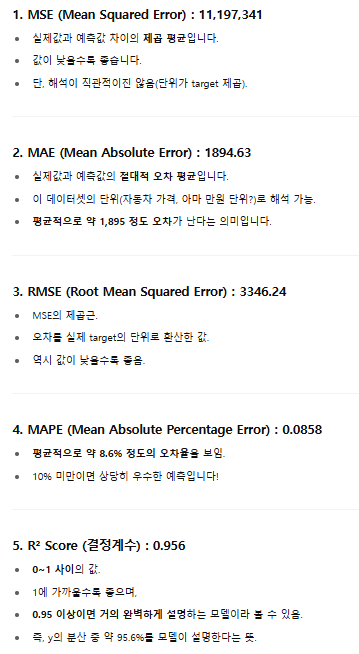

In [39]:
object_cols = ['brand', 'model', 'transmission', 'fuelType']

for col in object_cols:
    print(X_train[col].unique())
    print(X_test[col].unique())

print(X_train[object_cols].nunique())
print(X_test[object_cols].nunique())

#X_train에는 X_test에 없는 model이 있음 어떻게 할건가??? -> 상곤없어 X_test에 있는것만 X_train에 다있음됨

['hyundi' 'vauxhall' 'audi' 'vw' 'skoda' 'merc' 'toyota' 'bmw' 'ford']
['merc' 'vw' 'skoda' 'audi' 'vauxhall' 'toyota' 'ford' 'bmw' 'hyundi']
[' Santa Fe' ' GTC' ' RS4' ' Scirocco' ' Scala' ' V Class' ' Prius' ' M4'
 ' Camry' ' KA' ' Vivaro' ' CLS Class' ' Caravelle' ' Arteon' ' Shuttle'
 ' I40' ' IX20' ' 6 Series' ' GL Class' ' S Class' ' S3' ' Yeti' ' Galaxy'
 ' Puma' ' Edge' ' A8' ' SLK' ' Kamiq' ' RS6' ' CLA Class' ' Land Cruiser'
 ' M Class' ' Q8' ' i3' ' Verso' ' Mustang' ' IX35' ' Amarok' ' Avensis'
 ' Grand Tourneo Connect' ' Antara' ' Tourneo Connect' ' Beetle' ' X4'
 ' CC' ' GT86' ' X-CLASS' ' I800' ' i8' ' Caddy Maxi Life' ' Combo Life'
 ' Rapid' ' SQ7' ' Grand C-MAX' ' Tourneo Custom' ' California' ' Agila'
 ' A7' ' Zafira Tourer' ' G Class' ' Tiguan Allspace' ' X6' ' M2' ' X7'
 ' 7 Series' ' Z4' ' RS5' ' Hilux' ' GLS Class' ' GLB Class' ' M5' ' RS3'
 ' Caddy Life' ' SQ5' ' Supra' ' 8 Series' ' Fusion' ' M6' ' M3' ' Jetta'
 ' S4' ' R8' ' PROACE VERSO' ' Caddy' ' Getz' ' Eos